# Data Analysis

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [161]:
iris_data = pd.read_csv("./Iris.csv", index_col=0)

In [162]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

- How large is the iris_data?

In [163]:
iris_data.shape

(150, 5)

- So, this is a small data set, still we can draw some amazing insights from it, let's have a look!

- **Features Info**

In [164]:
iris_data.shape

(150, 5)

- So, this is a small data set, still we can draw some amazing insights from it, let's have a look!

- **Features Info**

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


- All but **Species** features is *object* type. Rest are *float64* type.
- Which is kind of obvious, because *Species* is a target variable agianst which our predictions will be compared.
- Rest are *float64* type, this makes our *preprocessing* easier as we don't have to take care of the data type conversion.

##### Categorizing values in the dataset:
    1. Categorical: finite set number of values
    2. Continuous: infinite number of values
    3. Discrete: finite number of values that must be numeric
- we need to make a list seperating features of our dataset on the basis of above 3 points.

- check the unique values of each feature:
    - if we miss any misformatted value.
    - to identify which type these feature belong amongst the above 3.

In [165]:
def find_unique(col,data):
    print('{}:{}'.format(col,data[col].unique()))

In [166]:
for col in iris_data.columns:
    find_unique(col,iris_data)

SepalLengthCm:[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm:[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm:[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm:[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Species:['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


- So, all but *Species* feature is categorical, and rest are continuous.
- Also since the features(except *Species*) are *float64* type, and all of these are continuous, without any misformatted value, we won't be needing much of *data prerocessing*.

- Check for null/missing values

In [167]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- Visualize the missing values

<AxesSubplot:ylabel='Id'>

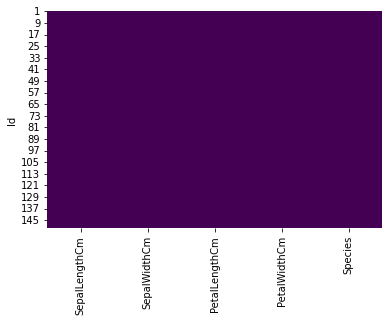

In [168]:
sns.heatmap(iris_data.isnull(), cbar=False, cmap='viridis')

- No null values in the data set
- So, no imputation required.

- Now, lets explore the data.
- Let's look at the relationships between the **target** and between other variables as well.
- Setting the target variable in the below cell.

In [169]:
target = iris_data['Species']
X = iris_data.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


1. relationship between **SepalLengthCm** and **target** using histplot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

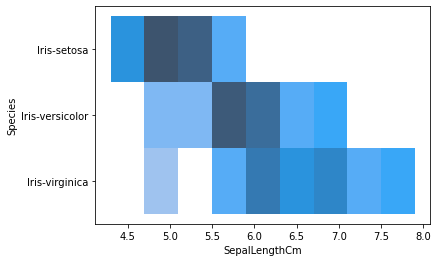

In [170]:
sns.histplot(x=iris_data['SepalLengthCm'], y=target)

- it can be seen from the above plot that *Iris-setosa* is almost classifiable while the rest form an overlapping perspective, when **SepalLengthCm >= 5.5**

2. Relationship between *SepalWidthCm* and *target* variable: using histplot 

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

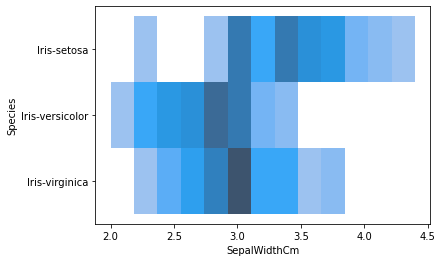

In [171]:
sns.histplot(x=iris_data['SepalWidthCm'], y=target)

- the above plot generates a fuzzy relationship between Species and SepalWidthCm.
- So, this feature may not effect the accuracy of our model much.
- this is because most of the classified region(of all the species) lies in the range of:

    *SepalWidthCm >= 2.7 and SepalWidthCm <= 3.5*

3. Relationship between *SepalLengthCm*/*SepalWidthCm* and target vairable: using swarmplot
    - because from the above dataset it's clear that most of the points overlapp incase of SepalWidthCm, and easily classifiable incase of SepalLengthCm.
    - So, from the plot below, we can infer that above the value of 1.75 *Iris-setosa* is most not present, hence easily classifiable at this margin.

<AxesSubplot:ylabel='Species'>

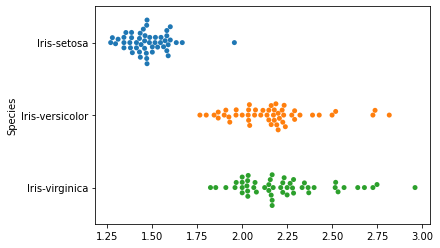

In [172]:
sns.swarmplot(x=iris_data['SepalLengthCm']/iris_data['SepalWidthCm'], y=target)

- **Conclusion from the above plot**:
    - The division of the above two features led us to a ***new*** feature!
    - This feature can be used for classification.
    - Thus, is an imporant feature.

4. Relationship between *PetalLengthCm* and *target*

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

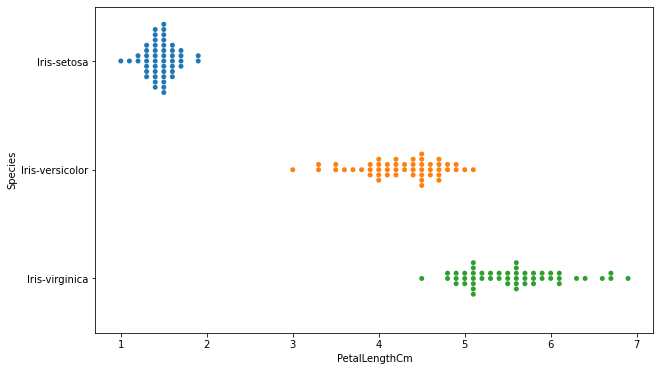

In [173]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=iris_data, x='PetalLengthCm', y=target)

- from the above swarmplot we can see that *Iris-setosa* is easily classifiable when the *PetalLengthCm* is in (0.5, 2).
- Also, in the range (3, 4.8) *Iris-versicolor* can be indentified, and in the range (4.8, 7) *Iris-virginica* can be indentified.
- So, the *PetalLengthCm* can be an **important** feature in our model.

5. Relationship between *PetalWidthCm* and *target* variable: using swarmplot

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

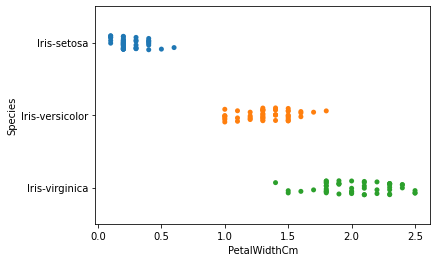

In [174]:
sns.stripplot(x=iris_data['PetalWidthCm'], y=target)

- again the plot can be easily classified for *Iris-setosa* but not clear for the rest species.
- in the below I've taken the petal_area(almost) to see it's variation with the target variable, let's see what I get.

<AxesSubplot:ylabel='Species'>

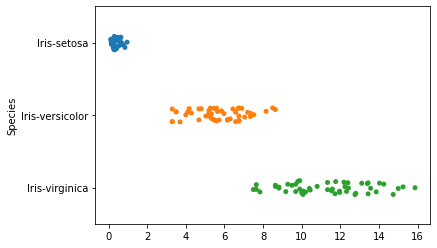

In [175]:
sns.stripplot(x=iris_data['PetalWidthCm']*iris_data['PetalLengthCm'], y=target)

- Now the plot can be used to easily classify between almost all the three species.
- for *Iris-setosa* the petal_area is in range (0, 1)
- for *Iris-versicolor* the petal_area is in range (3, 8.5)
- for *Iris-virginica* the petal_area is in range (7.5, 16)
SO, there is really a small portion in the intersection of the above two species i.e: *Iris-versicolor* and *Iris-virginica*, which actually favours our analysis!

- **Conclusion from the above plot**:
    - We can design a new feature named: **PetalArea**, which can play an important role towards a good model.

### Feature Engineering

#### 1. Feature selection
- From the EDA I observed that all the *input* variables are *continuous*.
- And that the *target* variable is *categorical*.
- Which means that the best suitable method for feature selection is **ANOVA** or *Analysis Of VAriance*. 

In [176]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feat = SelectKBest(f_classif, k=3)
fit = best_feat.fit(iris_data.drop('Species', axis=1),iris_data['Species'])
f_scores = pd.DataFrame(fit.scores_)
f_cols = pd.DataFrame(X.columns)
featureScores = pd.concat([f_cols,f_scores], axis=1)
featureScores.columns = ['feat', 'Score']
featureScores

,feat,Score
0,SepalLengthCm,119.264502
1,SepalWidthCm,47.364461
2,PetalLengthCm,1179.034328
3,PetalWidthCm,959.324406


- from the above table the highest value is only possessed by:
    - *SepalLengthCm*
    - *PetalLengthCm*
    - *PetalWidthCm*
- so, these features are actually more related to the dependent feature.
- And I'll consider only these 3 for my model, untill **Binning**

- **Dropping the SepalWidthCm feature**

In [177]:
iris_data.drop('SepalWidthCm', axis=1, inplace=True)
iris_data.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,
1,5.1,1.4,0.2,Iris-setosa
2,4.9,1.4,0.2,Iris-setosa
3,4.7,1.3,0.2,Iris-setosa
4,4.6,1.5,0.2,Iris-setosa
5,5.0,1.4,0.2,Iris-setosa


#### 2. Imbalanced dataset
- There is also a chance of a imbalanced dataset.
- is **iris_data** imbalanced?
- let's find out!

In [178]:
target_list = list(target)
types = {'Iris-setosa':0, 'Iris-versicolor':0, 'Iris-virginica':0}


In [179]:
def count_target(targetList, types):
    for val in targetList:
        types[val] += 1
        

In [180]:
print(types)

{'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}


- All the three categories of the **target** variable are balanced, because they have equal count in the dataset.
- So, we don't need to worry about the imbalanced dataset!

#### 3. Handle the outliers 

- Studying the outliers with the help of distributions.
- Using the **kde plot**

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

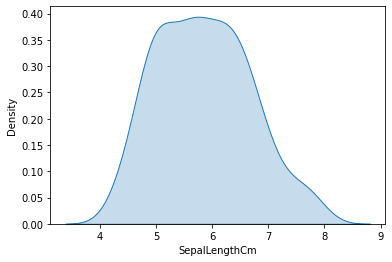

In [181]:
sns.kdeplot(data=iris_data['SepalLengthCm'], shade=True)

- the above plot shows that **SepalLengthCm** is almost normally skewed.
- which indicates that there are not outliers in **SepalLengthCm**.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

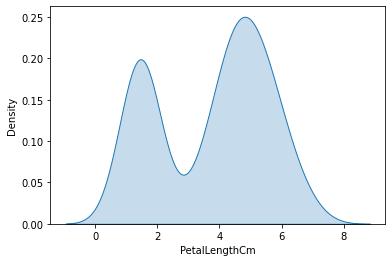

In [182]:
sns.kdeplot(data=iris_data['PetalLengthCm'], shade=True)

- again, the above plot does not contain out liers, because we cannot see any positive or negative skewness.

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

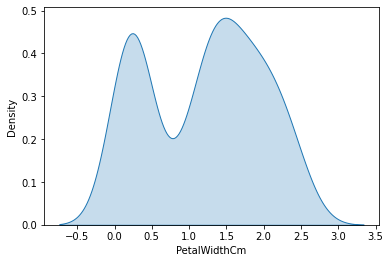

In [183]:
sns.kdeplot(data=iris_data['PetalWidthCm'], shade=True)

- Same goes for this plot above, *NO* positive or negative skewness so, probably no outliers.

- So, there are no outliers!

#### 4. Feature creation

- in the previous eda, I discussed about making some alterations in the feature, dividing, multiplying some of them, and saw some useful features, if imputed in the dataset can improve the model.
- let's visit one of them again!

- Showing the stripplot for the **Area** of the petal: *PetalLengthCm*X*PetalWidthCm*

<AxesSubplot:ylabel='Species'>

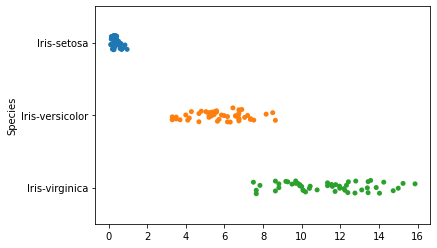

In [184]:
sns.stripplot(x=iris_data['PetalLengthCm']*iris_data['PetalWidthCm'],y=target)

- from the above plot it's crearly visible that all the 3 categories are classifiable.
- So, it's worth it considering *PetalArea* as a new feature.

In [185]:
petal_area = iris_data['PetalLengthCm']*iris_data['PetalWidthCm']
PetalArea = petal_area.to_frame(name='PetalArea')
PetalArea

,PetalArea
Id,
1,0.28
2,0.28
3,0.26
4,0.30
5,0.28
...,...
146,11.96
147,9.50
148,10.40


In [186]:
iris_data['PetalArea'] = PetalArea

In [187]:
iris_data.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species,PetalArea
Id,,,,,
1,5.1,1.4,0.2,Iris-setosa,0.28
2,4.9,1.4,0.2,Iris-setosa,0.28
3,4.7,1.3,0.2,Iris-setosa,0.26
4,4.6,1.5,0.2,Iris-setosa,0.30
5,5.0,1.4,0.2,Iris-setosa,0.28


- So, now we have our 4th feature, **PetalArea* !

#### 5. Feature Scaling

In [188]:
iris_data[['PetalLengthCm', 'PetalWidthCm', 'PetalArea', 'SepalLengthCm']].std()

PetalLengthCm    1.764420
PetalWidthCm     0.763161
PetalArea        4.713499
SepalLengthCm    0.828066
dtype: float64

In [189]:
iris_data[['PetalLengthCm', 'PetalWidthCm', 'PetalArea', 'SepalLengthCm']].mean()

PetalLengthCm    3.758667
PetalWidthCm     1.198667
PetalArea        5.793133
SepalLengthCm    5.843333
dtype: float64

- Since the mean, and standard deaviation are not 0, and 1 respectively, we've to perform *Standardization*.
- but first let's drop the **target** variable.

In [190]:
iris_data.drop('Species', axis=1, inplace=True)

- keeping the columns aside

In [191]:
cols = list(iris_data.columns)
cols

['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', 'PetalArea']

In [192]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
iris_data = scaler.fit_transform(iris_data)

- the above line returns a ndarray.
- so, we need to convert it to a DataFrame

In [193]:
iris_data

array([[-9.00681170e-01, -1.34127240e+00, -1.31297673e+00,
        -1.17356615e+00],
       [-1.14301691e+00, -1.34127240e+00, -1.31297673e+00,
        -1.17356615e+00],
       [-1.38535265e+00, -1.39813811e+00, -1.31297673e+00,
        -1.17782349e+00],
       [-1.50652052e+00, -1.28440670e+00, -1.31297673e+00,
        -1.16930880e+00],
       [-1.02184904e+00, -1.34127240e+00, -1.31297673e+00,
        -1.17356615e+00],
       [-5.37177559e-01, -1.17067529e+00, -1.05003079e+00,
        -1.08841920e+00],
       [-1.50652052e+00, -1.34127240e+00, -1.18150376e+00,
        -1.14376472e+00],
       [-1.02184904e+00, -1.28440670e+00, -1.31297673e+00,
        -1.16930880e+00],
       [-1.74885626e+00, -1.34127240e+00, -1.31297673e+00,
        -1.17356615e+00],
       [-1.14301691e+00, -1.28440670e+00, -1.44444970e+00,
        -1.20123890e+00],
       [-5.37177559e-01, -1.28440670e+00, -1.31297673e+00,
        -1.16930880e+00],
       [-1.26418478e+00, -1.22754100e+00, -1.31297673e+00,
      

In [194]:
type(iris_data)

numpy.ndarray

- Converting ndarray to DataFrame

In [195]:
iris_data = pd.DataFrame(iris_data, columns=cols)
iris_data.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,PetalArea
0,-0.900681,-1.341272,-1.312977,-1.173566
1,-1.143017,-1.341272,-1.312977,-1.173566
2,-1.385353,-1.398138,-1.312977,-1.177823
3,-1.506521,-1.284407,-1.312977,-1.169309
4,-1.021849,-1.341272,-1.312977,-1.173566


### Model building and Evaluation

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, target, random_state=0, test_size=0.3)

In [198]:
clf = DecisionTreeClassifier(criterion='entropy')

In [199]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [200]:
y_predict = clf.predict(X_test)

In [201]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy score on test data: ', accuracy_score(y_true=y_test, y_pred=y_predict))

Accuracy score on train data:  1.0
Accuracy score on test data:  0.9555555555555556


- currently our model's accuracy is 95.5% which is good!
- but this only for one random state i.e 0
- so, let's find the best random state which gives the highest accuracy!
- for this I'll write a python function.
- let's dive into the code!

In [202]:
def score_as_per_rand_state(data, target, random_state, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, random_state=random_state, test_size=test_size)
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    return accuracy_score(y_true=y_test, y_pred=y_predict)


In [203]:
random_states = [i for i in range(0, 101)]
scores = {}
for random_state in random_states:
    scores[random_state] = score_as_per_rand_state(
        iris_data, target, random_state, test_size=0.3)
best_score = max(scores.values())
required_rand_state_score = {
    random_state:score for random_state, score in scores.items() if score == best_score}
print(required_rand_state_score)


{15: 1.0, 17: 1.0, 40: 1.0, 57: 1.0, 74: 1.0}


- The above code prints a dictionary containing random_states as the key and value as the best_score
- So, the best random_state is ***15*** giving a score 100% !

- ***Final Model building and Evaluation***:

1. Split the dataset

In [204]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, target, random_state=15, test_size=0.3)

2. Select the model: Decision tree classifier;
    - algorithm: Decision tree

In [205]:
clf = DecisionTreeClassifier(criterion='entropy')

3. Fit the training set

In [206]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

4. Predict the output from your trained model

In [207]:
y_predict = clf.predict(X_test)

5. Print the accuracy score on train and test data

In [208]:
print('Accuracy score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy score on test data: ', accuracy_score(y_true=y_test, y_pred=y_predict))

Accuracy score on train data:  1.0
Accuracy score on test data:  1.0


### Final Result:
**Model's accuracy: 100%**

- All but **Species** features is *object* type. Rest are *float64* type.
- Which is kind of obvious, because *Species* is a target variable agianst which our predictions will be compared.
- Rest are *float64* type, this makes our *preprocessing* easier as we don't have to take care of the data type conversion.

##### Categorizing values in the dataset:
    1. Categorical: finite set number of values
    2. Continuous: infinite number of values
    3. Discrete: finite number of values that must be numeric
- we need to make a list seperating features of our dataset on the basis of above 3 points.

- check the unique values of each feature:
    - if we miss any misformatted value.
    - to identify which type these feature belong amongst the above 3.

In [6]:
def find_unique(col,data):
    print('{}:{}'.format(col,data[col].unique()))

In [7]:
for col in iris_data.columns:
    find_unique(col,iris_data)

SepalLengthCm:[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm:[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm:[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm:[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Species:['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


- So, all but *Species* feature is categorical, and rest are continuous.
- Also since the features(except *Species*) are *float64* type, and all of these are continuous, without any misformatted value, we won't be needing much of *data prerocessing*.

- Check for null/missing values

In [8]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- Visualize the missing values

<AxesSubplot:ylabel='Id'>

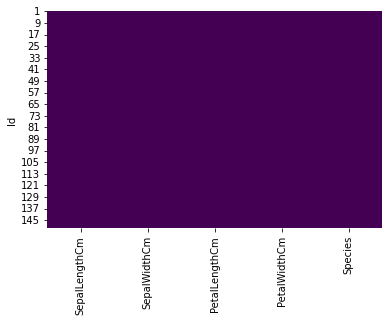

In [9]:
sns.heatmap(iris_data.isnull(), cbar=False, cmap='viridis')

- No null values in the data set
- So, no imputation required.

- Now, lets explore the data.
- Let's look at the relationships between the **target** and between other variables as well.
- Setting the target variable in the below cell.

In [27]:
target = iris_data['Species']
X = iris_data.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


1. relationship between **SepalLengthCm** and **target** using histplot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

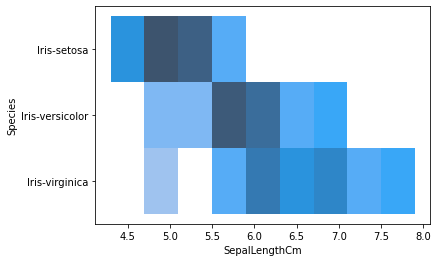

In [11]:
sns.histplot(x=iris_data['SepalLengthCm'], y=target)

- it can be seen from the above plot that *Iris-setosa* is almost classifiable while the rest form an overlapping perspective, when **SepalLengthCm >= 5.5**

2. Relationship between *SepalWidthCm* and *target* variable: using histplot 

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

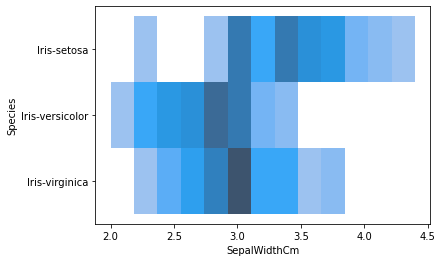

In [12]:
sns.histplot(x=iris_data['SepalWidthCm'], y=target)

- the above plot generates a fuzzy relationship between Species and SepalWidthCm.
- So, this feature may not effect the accuracy of our model much.
- this is because most of the classified region(of all the species) lies in the range of:

    *SepalWidthCm >= 2.7 and SepalWidthCm <= 3.5*

3. Relationship between *SepalLengthCm*/*SepalWidthCm* and target vairable: using swarmplot
    - because from the above dataset it's clear that most of the points overlapp incase of SepalWidthCm, and easily classifiable incase of SepalLengthCm.
    - So, from the plot below, we can infer that above the value of 1.75 *Iris-setosa* is most not present, hence easily classifiable at this margin.

<AxesSubplot:ylabel='Species'>

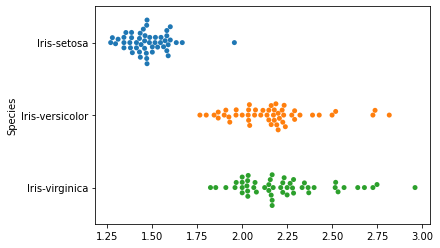

In [24]:
sns.swarmplot(x=iris_data['SepalLengthCm']/iris_data['SepalWidthCm'], y=target)

- **Conclusion from the above plot**:
    - The division of the above two features led us to a ***new*** feature!
    - This feature can be used for classification.
    - Thus, is an imporant feature.

4. Relationship between *PetalLengthCm* and *target*

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

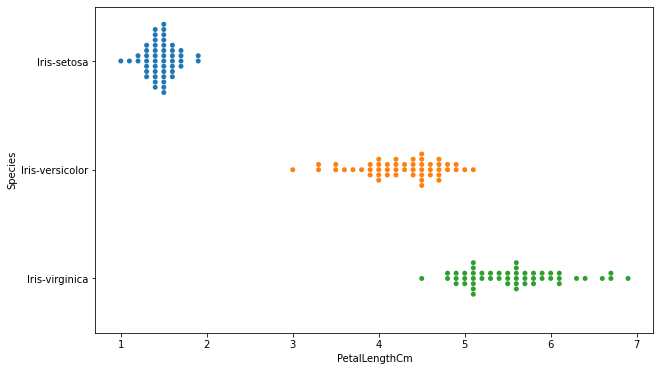

In [17]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=iris_data, x='PetalLengthCm', y=target)

- from the above swarmplot we can see that *Iris-setosa* is easily classifiable when the *PetalLengthCm* is in (0.5, 2).
- Also, in the range (3, 4.8) *Iris-versicolor* can be indentified, and in the range (4.8, 7) *Iris-virginica* can be indentified.
- So, the *PetalLengthCm* can be an **important** feature in our model.

5. Relationship between *PetalWidthCm* and *target* variable: using swarmplot

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

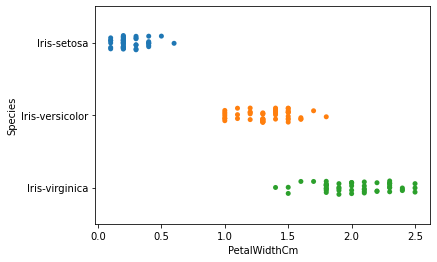

In [18]:
sns.stripplot(x=iris_data['PetalWidthCm'], y=target)

- again the plot can be easily classified for *Iris-setosa* but not clear for the rest species.
- in the below I've taken the petal_area(almost) to see it's variation with the target variable, let's see what I get.

<AxesSubplot:ylabel='Species'>

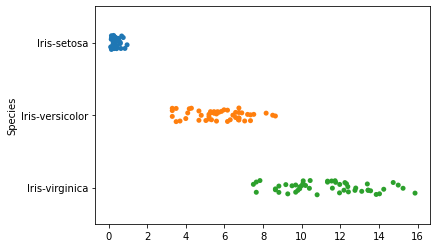

In [19]:
sns.stripplot(x=iris_data['PetalWidthCm']*iris_data['PetalLengthCm'], y=target)

- Now the plot can be used to easily classify between almost all the three species.
- for *Iris-setosa* the petal_area is in range (0, 1)
- for *Iris-versicolor* the petal_area is in range (3, 8.5)
- for *Iris-virginica* the petal_area is in range (7.5, 16)
SO, there is really a small portion in the intersection of the above two species i.e: *Iris-versicolor* and *Iris-virginica*, which actually favours our analysis!

- **Conclusion from the above plot**:
    - We can design a new feature named: **PetalArea**, which can play an important role towards a good model.

### Feature Engineering

#### 1. Feature selection
- From the EDA I observed that all the *input* variables are *continuous*.
- And that the *target* variable is *categorical*.
- Which means that the best suitable method for feature selection is **ANOVA** or *Analysis Of VAriance*. 

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feat = SelectKBest(f_classif, k=3)
fit = best_feat.fit(iris_data.drop('Species', axis=1),iris_data['Species'])
f_scores = pd.DataFrame(fit.scores_)
f_cols = pd.DataFrame(X.columns)
featureScores = pd.concat([f_cols,f_scores], axis=1)
featureScores.columns = ['feat', 'Score']
featureScores

,feat,Score
0,SepalLengthCm,119.264502
1,SepalWidthCm,47.364461
2,PetalLengthCm,1179.034328
3,PetalWidthCm,959.324406


- from the above table the highest value is only possessed by:
    - *SepalLengthCm*
    - *PetalLengthCm*
    - *PetalWidthCm*
- so, these features are actually more related to the dependent feature.
- And I'll consider only these 3 for my model, untill **Binning**

- **Dropping the SepalWidthCm feature**

In [34]:
iris_data.drop('SepalWidthCm', axis=1, inplace=True)
iris_data.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,
1,5.1,1.4,0.2,Iris-setosa
2,4.9,1.4,0.2,Iris-setosa
3,4.7,1.3,0.2,Iris-setosa
4,4.6,1.5,0.2,Iris-setosa
5,5.0,1.4,0.2,Iris-setosa


#### 2. Imbalanced dataset
- There is also a chance of a imbalanced dataset.
- is **iris_data** imbalanced?
- let's find out!

In [49]:
target_list = list(target)
types = {'Iris-setosa':0, 'Iris-versicolor':0, 'Iris-virginica':0}


In [52]:
def count_target(targetList, types):
    for val in targetList:
        types[val] += 1
        

In [53]:
print(types)

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


- All the three categories of the **target** variable are balanced, because they have equal count in the dataset.
- So, we don't need to worry about the imbalanced dataset!

#### 3. Handle the outliers 

- Studying the outliers with the help of distributions.
- Using the **kde plot**

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

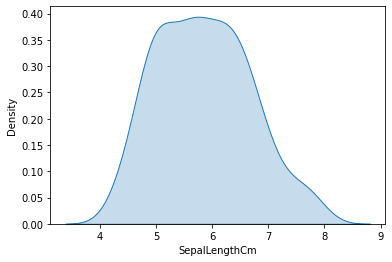

In [60]:
sns.kdeplot(data=iris_data['SepalLengthCm'], shade=True)

- the above plot shows that **SepalLengthCm** is almost normally skewed.
- which indicates that there are not outliers in **SepalLengthCm**.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

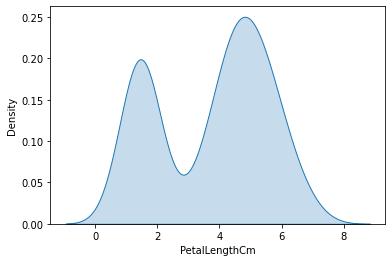

In [58]:
sns.kdeplot(data=iris_data['PetalLengthCm'], shade=True)

- again, the above plot does not contain out liers, because we cannot see any positive or negative skewness.

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

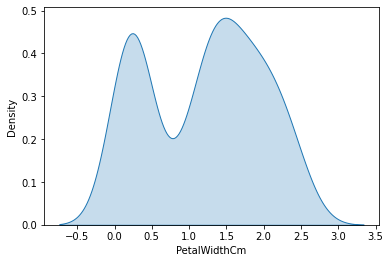

In [59]:
sns.kdeplot(data=iris_data['PetalWidthCm'], shade=True)

- Same goes for this plot above, *NO* positive or negative skewness so, probably no outliers.

- So, there are no outliers!

#### 4. Feature creation

- in the previous eda, we discussed